**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [140]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#The py file
import Exam_2023 as E23
model = E23.Model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Verify that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ with symbol Python

In [141]:
# write your code here
#Define the symbols
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')
w = sm.symbols('w')
w_tilde = sm.symbols('wtilde')
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
omega = sm.symbols('omega')
tau = sm.symbols('tau')

First we define the utility function

In [142]:
objective = sm.ln(C**alpha*G**(1-alpha))-nu*L**2/2
objective

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

We define the budget constraint

In [143]:
budget_constraint = kappa+(1-tau)*w*L
budget_constraint

L*w*(1 - tau) + kappa

We substitute the budget constraint into the utility function

In [144]:
objective_subs = objective.subs(C,budget_constraint)
objective_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*w*(1 - tau) + kappa)**alpha)

we substitute $\tilde{w}$ into the equation

In [145]:
objective_subs_2 = objective_subs.subs(w*(1-tau),w_tilde)
objective_subs_2

-L**2*nu/2 + log(G**(1 - alpha)*(L*wtilde + kappa)**alpha)

We find the first order condition

In [146]:
foc = sm.diff(objective_subs_2, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*wtilde/(L*wtilde + kappa) - L*nu

We solve the first order condition wrt. L

In [147]:
sol = sm.solve(sm.Eq(foc,0), L)
sol[0]

(-kappa*nu - sqrt(nu*(4*alpha*wtilde**2 + kappa**2*nu)))/(2*nu*wtilde)

We have the following parameters

In [148]:
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30
w = 1
G = 1.5
w_tilde = w*(1-tau)
w=1

Define the function numerically

We find the optimal hours of labour

In [149]:
def objective_function(L):
   C = kappa + (1 - tau) * w * L
   utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
   return -utility  # Negative sign for maximization




# Define the bounds for the variable L
bounds = [(0, 24)]

optimal_L = minimize(objective_function, x0=12, bounds=bounds).x[0]
print("Optimal hours of labor:", optimal_L)

Optimal hours of labor: 15.301203832018528


Find the optimal amount of labor in the Sympy model

In [150]:
# Define the function L_star
def L_star(w_tilde):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)
# w=1 =>w_tilde=0.7
L_star(0.7)

15.30165022719559

We find that the optimal hours of labor is 15.3 in the numerical and Sympy models

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

Below we make a plot of how the optimal labour supply depends on the wage 

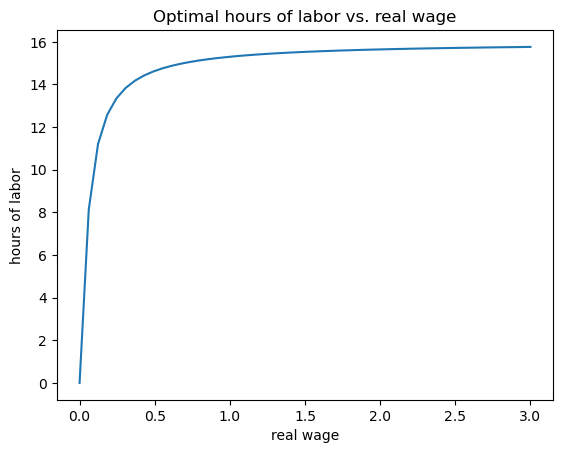

In [151]:

# Define the objective function with the budget constraint substituted in
def objective_function(L,w):
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(0, 24)]
w_values = np.linspace(0, 3, 50)  # Generate 50 values of w from 1 to 5
optimal_L_values = []

# Loop over different values of w
for w in w_values:
    optimal_L = minimize(objective_function, x0=12, args=(w,), bounds=bounds).x[0]
    optimal_L_values.append(optimal_L)

# Plot the results
x3 = ['real wage','hours of labor']
model.figure_1(w_values, optimal_L_values,x3)

From the figure above we see that up till a certain point, the optimal hours of labor increases as the real wage increases. When the optimal hours of labor have reached a point just below 16, higher real wages will no longer increase the optimal hours of labor.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


People consider government spending when working.

As the agents now gain utility from public consumption, the amount of hours worked increases such that $\alpha=0.5$ so agents don't prefer consumption for themselves over government consumption or vice versa.

First we define the function and then we loop over different values of tau

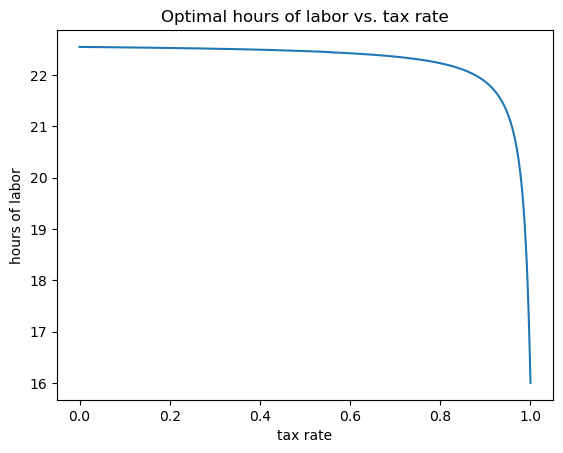

In [152]:
# Define the objective function with the budget constraint substituted in
def objective_function(L,tau):
    G = tau*w*L
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_L_values = []
optimal_G_values = []
optimal_utility_values = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function, x0=12, args=(tau,), bounds=bounds)
    optimal_L = solution.x[0]
    optimal_L_values.append(optimal_L)
    optimal_G = tau*w*optimal_L*((1-tau)*w)
    optimal_G_values.append(optimal_G)
    optimal_utility = -solution.fun
    optimal_utility_values.append(optimal_utility)
    
# Plot the results
x3 = ['tax rate','hours of labor']
model.figure_1(tau_values, optimal_L_values,x3)

The figure above shows the optimal hours of labor decrease when the tax rate increases, where the optimal hours of labor is about 22 for a tax rate up till 0.9 and falls to 16 hours for a tax rate of 1. The reason could be that the laborer get utility from the goernment consumption.

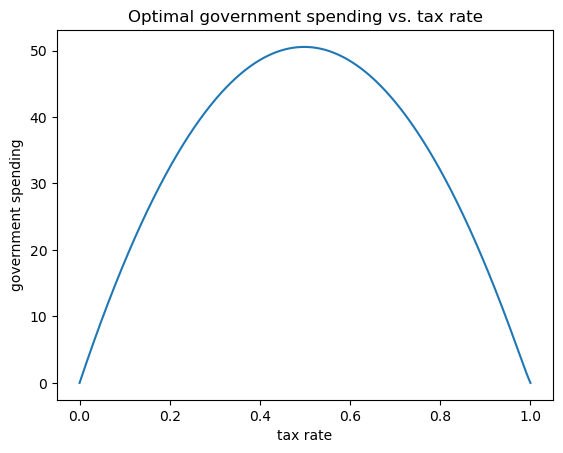

In [153]:
x3 = ['tax rate','government spending']
model.figure_1(tau_values, optimal_G_values,x3)

The optimal government spending increases from 0 to 50 when the tax rate increases from 0 to 0.5. For higher tax rates than that, the optimal government spending decrease and becomes 0 when the tax rate is 1.

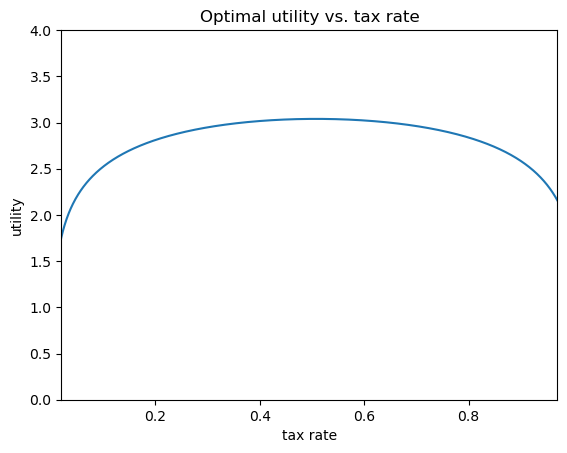

In [154]:
x3 = ['tax rate','utility']
plt.xlim(0.02,0.97)
plt.ylim(0,4)
model.figure_1(tau_values, optimal_utility_values,x3)

We see that the level of optimal utility is highest with a tax rate of 0.5 where we find a utility of 3. The utility is lowest in the extremes with a tax rate of 0 and 1.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [155]:
model.PrintOpt(tau_values,optimal_utility_values)

The optimum is found in the tax rate iteration 507. The optimal tax rate is 0.508, that is 51%. At this rate the utility is maximized at 3.039.


Looking at the last figure Optimal utility vs. tax rate it is seen that the difference in utility betweem tax rate 0.3 to 0.7 is small.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

When sigma=rho=1 the CES function converges to Coop-Douglas. So labor supply does not depend on G. 

In [156]:
# Define the objective function with the budget constraint substituted in
def objective_function_CES(L,tau,sigma,rho,epsilon):
    C = kappa + (1 - tau) * w * L
    G = tau*w*L
    utility = (((alpha*C**((sigma-1)/sigma) + (1-alpha)*G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho)-1)/(1-rho)-nu*L**(1+epsilon)/(1+epsilon)
    return -utility  # Negative sign for maximization

In [157]:
w=1
tau = 0.5075
sigma_values = [1.001, 1.5]
rho_values = [1.001, 1.5]
epsilon = 1


for i in range(2):
    sigma = sigma_values[i]
    rho = rho_values[i]

    optimal_result = minimize(objective_function_CES, x0=12, args=(tau, sigma, rho, epsilon), bounds=bounds)
    optimal_L = optimal_result.x[0]

    print("Optimal hours of labor set", i + 1, ":", optimal_L)

Optimal hours of labor set 1 : 22.118456068587847
Optimal hours of labor set 2 : 13.355002419916632


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

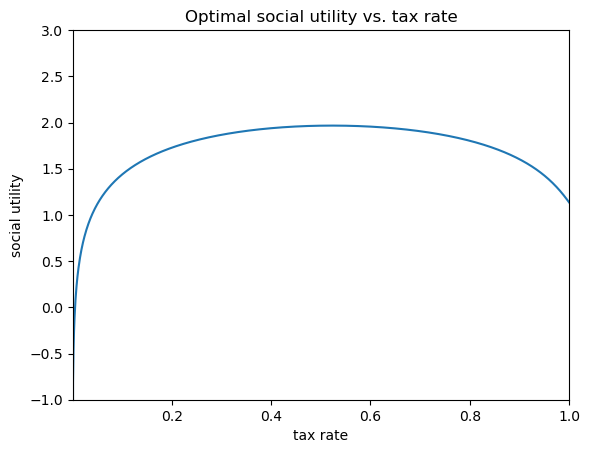

In [158]:
# write your code here  
# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_utility_values_1 = []

sigma=1.001
rho=1.001
epsilon=1
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_1 = -solution.fun
    optimal_utility_values_1.append(optimal_utility_1)
    
# Plot the results
x3 = ['tax rate','social utility']
plt.xlim(0.001,1)
plt.ylim(-1,3)
model.figure_1(tau_values, optimal_utility_values_1,x3)

From the figure above we see that when the parameters are set to $\sigma$ = 1.001, $\rho$ = 1.001 and $\epsilon$ = 1.0, the total optimal social utility is 1,97 with a tax rate of 0,52. The social utility increases with the tax rate till the 52% is reached

In [159]:
model.PrintOpt(tau_values,optimal_utility_values_1)

The optimum is found in the tax rate iteration 522. The optimal tax rate is 0.523, that is 52%. At this rate the utility is maximized at 1.967.


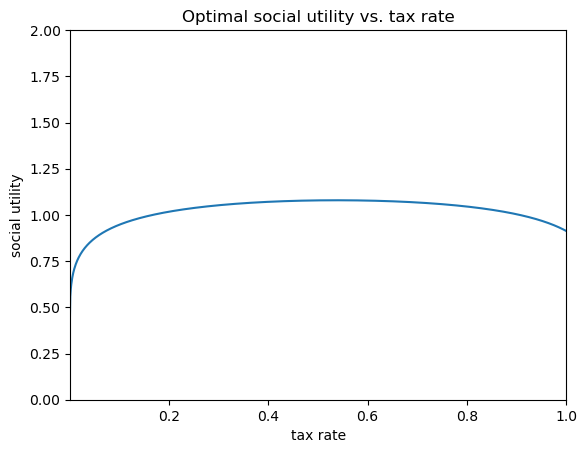

In [160]:
sigma=1.5
rho=1.5
epsilon=1
optimal_utility_values_2 = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_2 = -solution.fun
    optimal_utility_values_2.append(optimal_utility_2)
    
# Plot the results
x3 = ['tax rate','social utility']
plt.xlim(0.001,1)
plt.ylim(0,2)
model.figure_1(tau_values, optimal_utility_values_2,x3)

When we change our parameters such that $\sigma$ = 1.5, $\rho$ = 1.5 and $\epsilon$ = 1.0, the tax rate increases to 0.54 in order to get the optimal social utility of 1.08.

In [161]:
model.PrintOpt(tau_values,optimal_utility_values_2)

The optimum is found in the tax rate iteration 537. The optimal tax rate is 0.538, that is 54%. At this rate the utility is maximized at 1.079.


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [162]:
#define profit function
def profit(l, kappa):
    profit = kappa * l**(1 - eta) - w * l
    return -profit
# define parameters
eta = 0.5
w = 1


kappa_values = [1, 2]


for kappa in kappa_values:
    result = minimize(profit, x0=0, args=(kappa,))
    optimum_l = result.x[0]
    optimum_profit = -result.fun


    print(f"Kappa= {kappa}: Optimum l= {optimum_l:.6f} Optimum profit= {optimum_profit:.12f}")

Kappa= 1: Optimum l= 0.249996 Optimum profit= 0.249999999987
Kappa= 2: Optimum l= 0.999998 Optimum profit= 0.999999999998


Varify that these are the correct solutions using the analytical solution

In [163]:
# We define the sol_l() function to varify that these a the correct solutions and plot in kappa=0 and kappa=1. 
def sol_l(eta,w,kappa):
    return((1-eta)*kappa/w)**(1/eta)
for kappa in kappa_values:
    optimum_l = sol_l(eta, w, kappa)
    print(f"Kappa= {kappa}: Optimum l= {optimum_l}")

Kappa= 1: Optimum l= 0.25
Kappa= 2: Optimum l= 1.0


We see that given Kappa 1 and 2 that the solutions for l are similar in the numerical and analytical solutions

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [164]:
# Parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1

We first define demand shocks given by the AR(1) proces and calculate the optimal number of employees.

In [165]:
def demand_shocks(rho, sigma_epsilon, K, eta, w):
    np.random.seed(3)
    kappa_series = []
    labor_series = []

    #Make a loop over the series of random shocks
    for series in range(K):
        #Set start values to 0 and 1
        kappa_values = [1]
        labor_values = [0]

        #Iterate for the 120 periods
        for t in range(1, 120):
            epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
            log_kappa = rho * np.log(kappa_values[t-1]) + epsilon
            kappa_t = np.exp(log_kappa)
            kappa_values.append(kappa_t)
            #Calculate the labor given values of kappa using solution from question 1
            labor_t = sol_l(eta, w, kappa_t)
            labor_values.append(labor_t)

        #Append the results
        kappa_series.append(kappa_values)
        labor_series.append(labor_values)


    return kappa_series, labor_series



In [166]:
# evalute funciton in K=100
K = 100
shocks_list, labor_list = demand_shocks(rho, sigma_epsilon, K, eta, w)

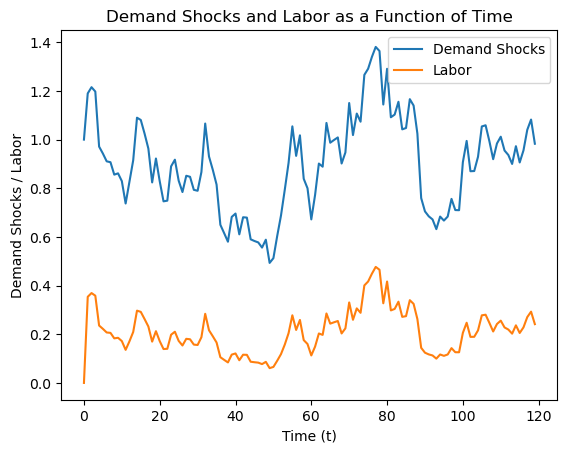

In [167]:
# look at the first series of demand schocks
demand_shock = shocks_list[0]
labor = labor_list[0]
#make plot of demand shocks and labor.
plt.plot(demand_shock, label='Demand Shocks')
plt.plot(labor, label='Labor')
plt.xlabel('Time (t)')
plt.ylabel('Demand Shocks / Labor')
plt.title('Demand Shocks and Labor as a Function of Time')
plt.legend()
plt.show()


We see in the figure that the demand shocks follow an AR(1) process and that labor varies proportionately with the demand shocks

In [168]:
# Function to calculate the ex-post value of the salon
def ex_post_value(demand_shocks, labor):
    value = 0
    for t in range(len(demand_shocks)):
        profit = demand_shocks[t] * labor[t] ** (1 - eta) - w * labor[t]
        adjustment_cost = iota if t > 0 and labor[t] != labor[t-1] else 0
        value += R ** (-t) * (profit - adjustment_cost)
    return value

Return ex-post value and save them in a list. Calculate H based on this. We  make a list of K.

In [169]:
K_list=(10,50,100,500,800,1000)
h_list = []
for K in K_list:
    #We return K lists of the demand shocks and labor
    shocks_list, labor_list = demand_shocks(rho, sigma_epsilon, K, eta, w)
    for i in range(K):
        #We return the ex post value and append it to h_list
        h = ex_post_value(shocks_list[i], labor_list[i])
        h_list.append(h)
        #Find H as the mean of h
    print(f"Mean of h for K= {K} is H= {np.mean(h_list):.3f}")

Mean of h for K= 10 is H= 27.212
Mean of h for K= 50 is H= 25.583
Mean of h for K= 100 is H= 25.891
Mean of h for K= 500 is H= 27.011
Mean of h for K= 800 is H= 27.201
Mean of h for K= 1000 is H= 27.274


For K=500 the approximation is good enough for H not to vary substantially. The true H $\approx$ 27.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We define a new function called new_policy that implements the policy and calculate the optimal number of employees.

In [170]:
K=100
def new_policy(rho, sigma_epsilon, K, eta, w, delta):
    np.random.seed(3)  
    kappa_series = []
    labor_series = []

    #Make a loop over the series of random shocks
    for series in range(K):
        kappa_values = [1]
        labor_values = [0]

        #Iterate for the 120 periods
        for t in range(1, 120):
            epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
            log_kappa = rho * np.log(kappa_values[t-1]) + epsilon
            kappa_t = np.exp(log_kappa)
            kappa_values.append(kappa_t)

            #Calculate the labor given values of kappa using the new policy implementation
            labor_t = labor(eta, w, kappa_t, labor_values[t-1], delta)
            labor_values.append(labor_t)

        #Append the results
        kappa_series.append(kappa_values)
        labor_series.append(labor_values)


    return kappa_series, labor_series



#Define the new policy implementation
def labor(eta, w, kappa, previous_labor, delta):
    labor_star = ((1 - eta) * kappa / w) ** (1 / eta)
    if abs(previous_labor - labor_star) > delta:
        labor = labor_star
    else:
        labor = previous_labor


    return labor

In [171]:
#Get the demand shock and labor series under the new and old policies for 100 simulations and Delta=0.05
K= 100
delta =0.05
kappa_series, labor_series = new_policy(rho, sigma_epsilon, K, eta, w, delta)
shocks_list, labor_list = demand_shocks(rho, sigma_epsilon, K, eta, w)

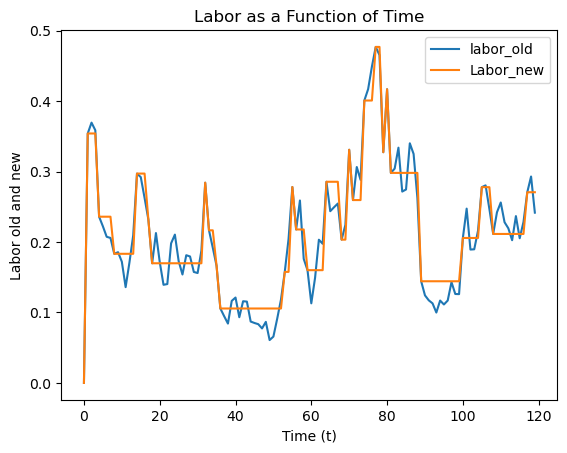

In [172]:



# look at the first series of demand schocks
labor_old = labor_list[0]
labor_new = labor_series[0]
#make plot of demand shocks and labor.
plt.plot(labor_old, label='labor_old')
plt.plot(labor_new, label='Labor_new')
plt.xlabel('Time (t)')
plt.ylabel('Labor old and new')
plt.title('Labor as a Function of Time')
plt.legend()
plt.show()


We plot the optimal number of employees when the new policy is implemented. When $\Delta=0$ the optimal number of employees is the same under the new and old policies. Because $\Delta=0.05>0$ the number of employees is sometimes the same as in the previous period. 

In [173]:
delta = 0.05
K_list=(10,50,100,500,800,1000)
h_list = []
for K in K_list:
    kappa_series, labor_series = new_policy(rho, sigma_epsilon, K, eta, w, delta)
    for i in range(K):
        h = ex_post_value(kappa_series[i], labor_series[i])
        h_list.append(h)
    print(f"Mean of h for k= {K} is H= {np.mean(h_list):.3f}")

Mean of h for k= 10 is H= 27.899
Mean of h for k= 50 is H= 26.287
Mean of h for k= 100 is H= 26.589
Mean of h for k= 500 is H= 27.694
Mean of h for k= 800 is H= 27.881
Mean of h for k= 1000 is H= 27.954


The true $H \approx 28>27$. The new policy improves the profitability. The intuition is that it is optimal to leave the number of employees fixed due to the cost of hiring and firing.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [174]:
K=1000
deltas = (0.0,0.05,0.1,0.2,0.3,0.4)
h_list = []
for delta in deltas:
    kappa_series, labor_series = new_policy(rho, sigma_epsilon, K, eta, w, delta)
    for i in range(K):
        h = ex_post_value(kappa_series[i], labor_series[i])
        h_list.append(h)
    print(f"delta= {delta} => H= {np.mean(h_list):.3f}")

delta= 0.0 => H= 27.381
delta= 0.05 => H= 27.720
delta= 0.1 => H= 27.840
delta= 0.2 => H= 27.746
delta= 0.3 => H= 27.065
delta= 0.4 => H= 25.595


When $\Delta > 0.2$ profitability, H, decreases.

We repeat the code and append the results for use in a graph. We zoom in where $\Delta$ is in the range 0 to 0.3. The code takes 23 seconds

In [175]:
K=1000
deltas = [delta / 100 for delta in range(0, 31)]
H_list= []
h_list = []
for delta in deltas:
    kappa_series, labor_series = new_policy(rho, sigma_epsilon, K, eta, w, delta)
    for i in range(K):
        h = ex_post_value(kappa_series[i], labor_series[i])
        h_list.append(h)
    H=np.mean(h_list)
    H_list.append(H)


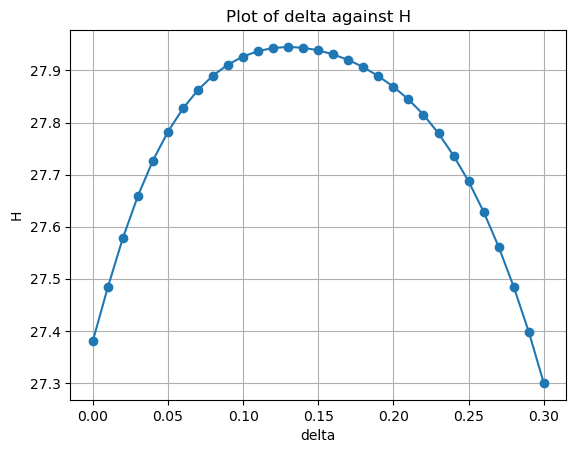

In [176]:
#Create the plot
plt.plot(deltas, H_list, 'o-')
plt.xlabel('delta')
plt.ylabel('H')
plt.title('Plot of delta against H')
plt.grid(True)
plt.show()


Here we see that the profitability is at its highest for $\Delta=0.13$. In the prior question we saw that profitability increased when $\Delta=0.05$ compared to $\Delta=0.00$ which is confirmed by looking at the graph. However, when $\Delta>0.13$ profitability starts to decrease.

In [177]:
#Find maximum value in H_list
MAX_H= max( (v, i) for i, v in enumerate(H_list) )
print("The maximum value of H is:",MAX_H[0])
# Find the delta that maximizes H
print(f"delta that maximizes H is: {deltas[MAX_H[1]]}")

The maximum value of H is: 27.94511827359598
delta that maximizes H is: 0.13



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Our new policy is :


$$


\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\epsilon_t \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\


$$


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [179]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [180]:
# We start by defining the global optimizer function


def GlobalOpt(K_warmup):


   #Settings
  
   # (1) We set tolerance > 0
   np.random.seed(3)
   tol=1e-8


   # (2) We choose the maximum number of iterations > warmwp-iterations
   # Furthermore we define a optimal x and function values
   K_max = 1000
   xs = np.empty((5000,2))
   xopt = np.nan
   fopt=np.inf


   # We make an empty vector of initial guesses and set it as a global for plotting
   global x_k0_values
   x_k0_values = []
   # (3) Iterate for k in {0,1,...,K-1}:
   for k in range(K_max):




       # (3.A + 1) We choose bounds and draw random numbers
       x_k = -600 + 1200*np.random.uniform(size=(2,)) #bounds




       # (3.B) If  numbers of iterations < number of warm-up iterations then go to E
       if k < K_warmup:
           x_k0 = x_k    
          
       else:
           # (3.C) Calculate chi_k
           chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))


           # (3.D) Redefine the initial guess
           x_k0 = chi_k * x_k + (1 - chi_k) * xopt


       # (3.E) Run optimizer
       result = minimize(griewank, x_k0, method='BFGS', tol=tol)
       xs[k,:] = result.x
      
       # (3.F) We set xopt = x_k0 if k = 0 or f(x_k0) < fopt
       if k == 0 or result.fun < fopt:
           xopt = xs[k,:]
           fopt = result.fun

        
       x_k0_values.append(x_k0)


       # (3.G) If fopt < tau go to step 4
      
       if fopt < tol:
          
          
           break
      
  
   print(f"Iteration {k}: x_opt = {xopt[0],xopt[1]}, f(x_k0) = {fopt}")
   

In [181]:
# (2) numbers of warmup-interations > 0
K_warmup=10
# (4) Return the result xopt by calling the global optimizer function
GlobalOpt(K_warmup)


Iteration 139: x_opt = (-8.993968409116461e-09, 3.5676375227375716e-09), f(x_k0) = 0.0


We make an illustration of how the inital guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$

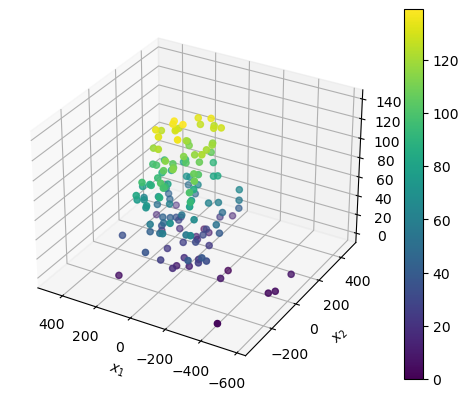

In [182]:
model.figure_3(x_k0_values)

On the figure the convergence is illustrated as the $x_1$ and $x_2$ values move closer to the optimal value with. The convergence is quick for the first few iterations. Then as they go from being blue to light green, iteration 40-139, the changes are smaller till the optimum is reached at iteration 139 where $f(x_1,x_2)=f(-8.9e-09, 3.5e-09) \approx f(0,0)$ 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We set the K_warmup = 100 to see what the number of iterations is before the convergence happens.

In [183]:
K_warmup=100
GlobalOpt(K_warmup)

Iteration 470: x_opt = (-3.7669608854800825e-09, -1.4137576514706536e-08), f(x_k0) = 0.0


Similar to question 1 we make an illustration of how the inital guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$ but with $K_{warmup}=100$

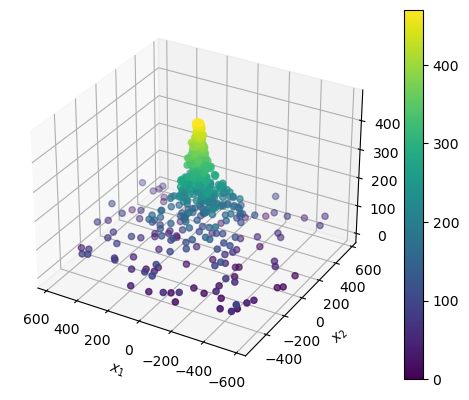

In [184]:
model.figure_3(x_k0_values)

On the figure the convergence is illustrated where the warmup is set to 100 iterations. The convergence moves quicker for the first iterations. The main difference is that the convergence is slower compared to with a warmup of 10, 139 vs 470 iterations. The optimum is reached at iteration 470 where $f(x_1,x_2)=f(-3.8e-09, -1.4e-8) \approx f(0,0)$ 